In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
df = pd.read_csv(r'data\tips_bad.csv')
df2 = df
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [212]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
12,15.42,1.57,?,No,Sun,Dinner,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
18,16.97,3.50,Female,No,Sun,Dinner,3
123,15.95,2.00,Male,No,Thur,Lunch,2
0,16.99,1.01,Female,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
10,10.27,1.71,Male,No,Sun,Dinner,2
154,19.77,2.00,Male,No,Sun,Dinner,4
152,17.26,2.74,Male,No,Sun,Dinner,3


In [213]:
df.info() # there are 3 null values in total_bill and so on but no null values 
          #in sex even though ? is present it is treated  as bad data but not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  241 non-null    float64
 1   tip         241 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         243 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    object 
dtypes: float64(2), object(5)
memory usage: 13.5+ KB


In [214]:
df.total_bill.value_counts() # it is beacuse null value is not detected by value _counts

total_bill
13.42    3
20.69    2
7.25     2
18.29    2
13.00    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: count, Length: 226, dtype: int64

How to check null values is present or not

In [216]:
df.total_bill.isna().sum() # insa() checks for the null value per column

3

In [217]:
df.isna().sum() # finds the sum of null values in the whole dataframe

total_bill    3
tip           3
sex           0
smoker        0
day           1
time          0
size          0
dtype: int64

In [218]:
df.sex.value_counts()

sex
Male      156
Female     84
?           4
Name: count, dtype: int64

In [219]:
df.sex = df.sex.replace('?', 'Male') # changing the symbol with most probale value
df.sex.value_counts()

sex
Male      160
Female     84
Name: count, dtype: int64

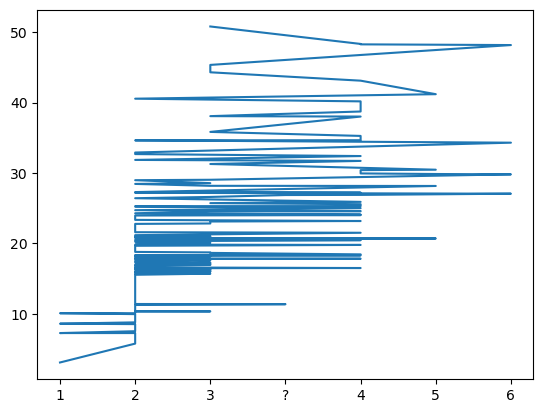

In [220]:
dfq = df.sort_values('total_bill')
plt.plot(dfq['size'], dfq.total_bill)

In [221]:
df['size'].value_counts() #can detect bad data or unwanted symbols

size
2    154
3     38
4     37
5      5
1      4
6      4
?      2
Name: count, dtype: int64

In [222]:
df['size'] = pd.to_numeric(df['size'], errors = 'coerce')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [223]:
dff = df[['size']].dropna() # dropping the NaN from the the selected column
dff

,size
0,2.0
1,3.0
2,3.0
3,2.0
4,4.0
...,...
239,3.0
240,2.0
241,2.0
242,2.0


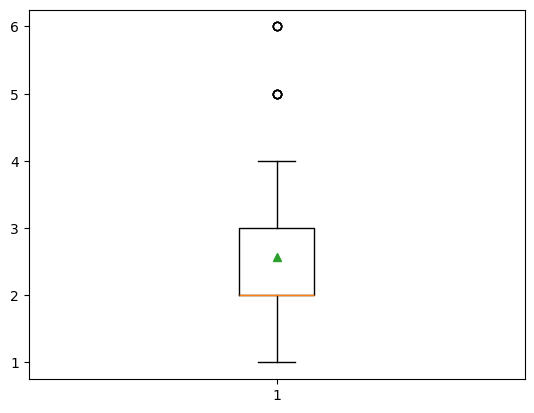

In [224]:
plt.figure()
plt.boxplot(dff, showmeans = True)
plt.show()

In [225]:
df = df[df['size']<= 4] #removing the outliers as the outliers is above 4
df['size'].value_counts()

size
2.0    154
3.0     38
4.0     37
1.0      4
Name: count, dtype: int64

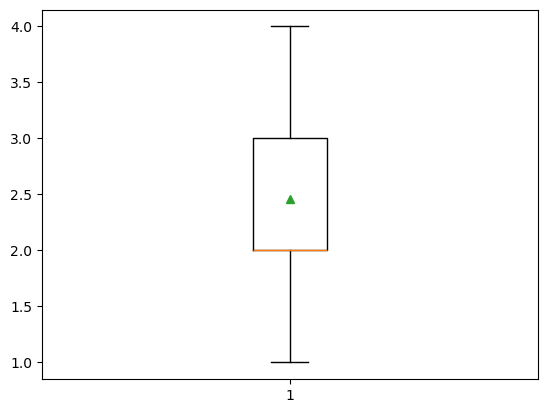

In [226]:
plt.figure()
plt.boxplot(df['size'], showmeans = True)
plt.show()

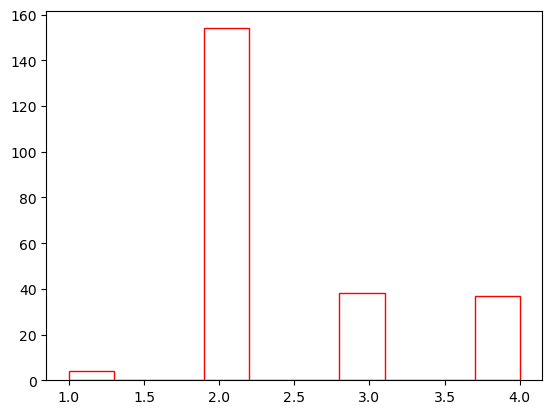

In [227]:
plt.figure()
plt.hist(df['size'], color = 'w', edgecolor = 'red', bins = 10)
plt.show()

In [228]:
bills_cleaned = df2['total_bill'].dropna()
bills_cleaned.isna().sum()

0

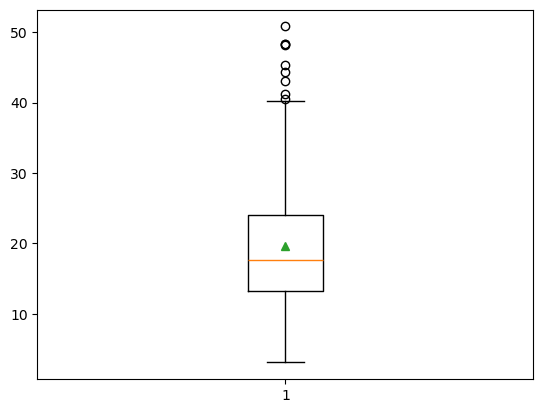

In [229]:
plt.figure()
plt.boxplot(bills_cleaned, showmeans = True)
plt.show()

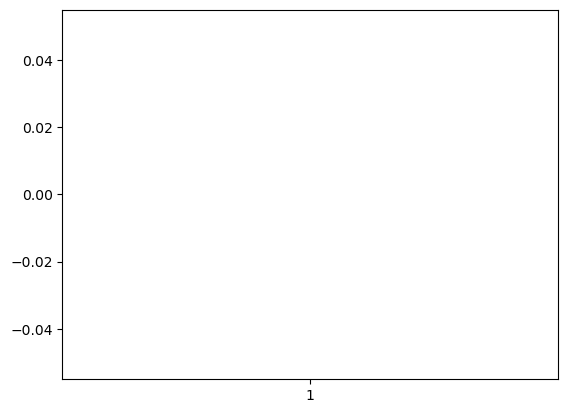

In [258]:
t_clean = df2['size'].dropna()
print(t_clean.isna().sum())
Q1 = t_clean.quantile(0.25)
Q3 = t_clean.quantile(0.75)
IQR=Q3-Q1
tips_cleaned=t_clean[~((t_clean<(Q1-1.5*IQR)) | (t_clean>(Q3+1.5*IQR)))]

plt.figure()
plt.boxplot(tips_cleaned,showmeans=True)
plt.show()